In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [4]:
#reading the data
data_multi=pd.read_csv("female_fertility_data.csv")
#displaying the first five rows
data_multi.head()

,age,BMI,menstrual_cycle_irregularity,chronic_conditions,stress_level,fertility_rate,number_of_previous_pregnancies,previous_fertility_treatments,exercise_habits,history_of_miscarriages
0,43,33.171975,1,0,3,0,3,1,0,2
1,36,19.336654,0,1,3,1,4,1,0,1
2,40,23.625551,1,1,5,2,1,0,0,1
3,28,22.220887,0,1,6,3,4,0,0,2
4,28,34.796237,1,0,6,1,3,0,1,2


In [5]:
data_multi.describe()

,age,BMI,menstrual_cycle_irregularity,chronic_conditions,stress_level,fertility_rate,number_of_previous_pregnancies,previous_fertility_treatments,exercise_habits,history_of_miscarriages
count,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,31.271791,26.397136,0.496911,0.509609,5.484214,4.465683,2.020247,0.502745,0.502059,0.993823
std,7.853987,4.953697,0.500076,0.499993,2.884775,3.360637,1.396357,0.500078,0.500082,0.814368
min,18.000000,18.002682,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,22.059485,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,26.386065,0.000000,1.000000,5.000000,4.000000,2.000000,1.000000,1.000000,1.000000
75%,38.000000,30.760757,1.000000,1.000000,8.000000,8.000000,3.000000,1.000000,1.000000,2.000000
max,44.000000,34.998722,1.000000,1.000000,10.000000,13.000000,4.000000,1.000000,1.000000,2.000000


In [6]:
data_multi.columns

Index(['age', 'BMI', 'menstrual_cycle_irregularity', 'chronic_conditions',
       'stress_level', 'fertility_rate', 'number_of_previous_pregnancies',
       'previous_fertility_treatments', 'exercise_habits',
       'history_of_miscarriages'],
      dtype='object')

In [7]:
data_multi.isnull().sum()

age                               0
BMI                               0
menstrual_cycle_irregularity      0
chronic_conditions                0
stress_level                      0
fertility_rate                    0
number_of_previous_pregnancies    0
previous_fertility_treatments     0
exercise_habits                   0
history_of_miscarriages           0
dtype: int64

In [11]:
#remove any leading or trailing whitespace from the column names in the DataFrame, hence preventing errors
data_multi.columns = data_multi.columns.str.strip()

In [12]:
from scipy import stats
duplicates=data_multi.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2909    False
2910    False
2911    False
2912    False
2913    False
Length: 2914, dtype: bool


In [14]:
data_above_18=data_multi[data_multi['age']>18]
data_above_18.head()

,age,BMI,menstrual_cycle_irregularity,chronic_conditions,stress_level,fertility_rate,number_of_previous_pregnancies,previous_fertility_treatments,exercise_habits,history_of_miscarriages
0,43,33.171975,1,0,3,0,3,1,0,2
1,36,19.336654,0,1,3,1,4,1,0,1
2,40,23.625551,1,1,5,2,1,0,0,1
3,28,22.220887,0,1,6,3,4,0,0,2
4,28,34.796237,1,0,6,1,3,0,1,2


In [15]:
data_multi.shape

(2914, 10)

In [16]:
data_multi.isnull().sum()

age                               0
BMI                               0
menstrual_cycle_irregularity      0
chronic_conditions                0
stress_level                      0
fertility_rate                    0
number_of_previous_pregnancies    0
previous_fertility_treatments     0
exercise_habits                   0
history_of_miscarriages           0
dtype: int64

In [17]:
data_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             2914 non-null   int64  
 1   BMI                             2914 non-null   float64
 2   menstrual_cycle_irregularity    2914 non-null   int64  
 3   chronic_conditions              2914 non-null   int64  
 4   stress_level                    2914 non-null   int64  
 5   fertility_rate                  2914 non-null   int64  
 6   number_of_previous_pregnancies  2914 non-null   int64  
 7   previous_fertility_treatments   2914 non-null   int64  
 8   exercise_habits                 2914 non-null   int64  
 9   history_of_miscarriages         2914 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 227.8 KB


In [18]:
sorted_data=data_multi.sort_values(by='fertility_rate',ascending=False)
data_multi.head()

,age,BMI,menstrual_cycle_irregularity,chronic_conditions,stress_level,fertility_rate,number_of_previous_pregnancies,previous_fertility_treatments,exercise_habits,history_of_miscarriages
0,43,33.171975,1,0,3,0,3,1,0,2
1,36,19.336654,0,1,3,1,4,1,0,1
2,40,23.625551,1,1,5,2,1,0,0,1
3,28,22.220887,0,1,6,3,4,0,0,2
4,28,34.796237,1,0,6,1,3,0,1,2


In [19]:
new_data=data_multi[["age","BMI","menstrual_cycle_irregularity","chronic_conditions","stress_level","fertility_rate","number_of_previous_pregnancies","previous_fertility_treatments","exercise_habits","history_of_miscarriages"]]
new_data.head()

,age,BMI,menstrual_cycle_irregularity,chronic_conditions,stress_level,fertility_rate,number_of_previous_pregnancies,previous_fertility_treatments,exercise_habits,history_of_miscarriages
0,43,33.171975,1,0,3,0,3,1,0,2
1,36,19.336654,0,1,3,1,4,1,0,1
2,40,23.625551,1,1,5,2,1,0,0,1
3,28,22.220887,0,1,6,3,4,0,0,2
4,28,34.796237,1,0,6,1,3,0,1,2


In [20]:
new_data.dropna(inplace=True)

In [21]:
new_data["fertility_rate"]=pd.to_numeric(new_data["fertility_rate"],errors='coerce')
df_cleaned=new_data.dropna(subset="fertility_rate")
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             2914 non-null   int64  
 1   BMI                             2914 non-null   float64
 2   menstrual_cycle_irregularity    2914 non-null   int64  
 3   chronic_conditions              2914 non-null   int64  
 4   stress_level                    2914 non-null   int64  
 5   fertility_rate                  2914 non-null   int64  
 6   number_of_previous_pregnancies  2914 non-null   int64  
 7   previous_fertility_treatments   2914 non-null   int64  
 8   exercise_habits                 2914 non-null   int64  
 9   history_of_miscarriages         2914 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 227.8 KB


In [22]:
from sklearn.preprocessing import StandardScaler
x=df_cleaned.drop('fertility_rate',axis=1)
y=df_cleaned['fertility_rate']
scaler=StandardScaler()
x_scaled=scaled=scaler.fit_transform(x)

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             2914 non-null   int64  
 1   BMI                             2914 non-null   float64
 2   menstrual_cycle_irregularity    2914 non-null   int64  
 3   chronic_conditions              2914 non-null   int64  
 4   stress_level                    2914 non-null   int64  
 5   fertility_rate                  2914 non-null   int64  
 6   number_of_previous_pregnancies  2914 non-null   int64  
 7   previous_fertility_treatments   2914 non-null   int64  
 8   exercise_habits                 2914 non-null   int64  
 9   history_of_miscarriages         2914 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 227.8 KB


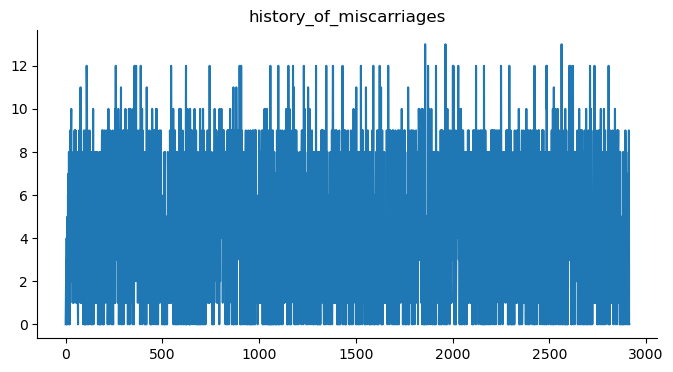

In [24]:
# Child's weight

from matplotlib import pyplot as plt
df_cleaned["fertility_rate"].plot(kind="line", figsize=(8, 4), title="history_of_miscarriages")
plt.gca().spines[['top', 'right']].set_visible(False)

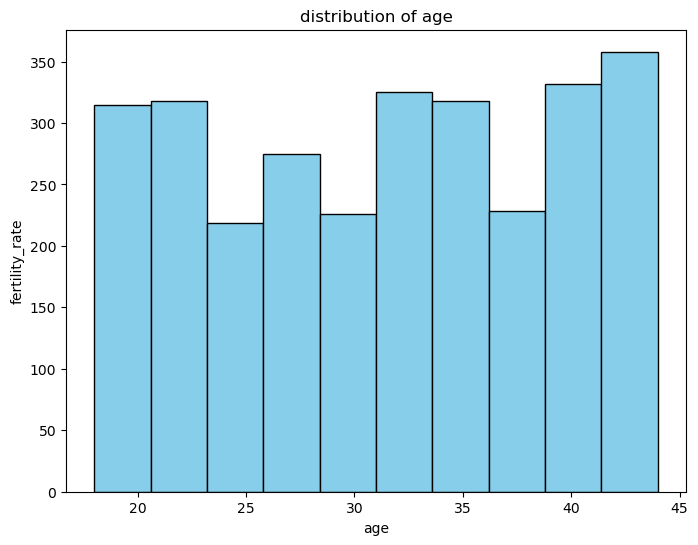

In [27]:
plt.figure(figsize=(8,6))
plt.hist(data_multi['age'],bins=10,color='skyblue',edgecolor='black')
plt.title('distribution of age')
plt.xlabel('age')
plt.ylabel('fertility_rate')
plt.show()

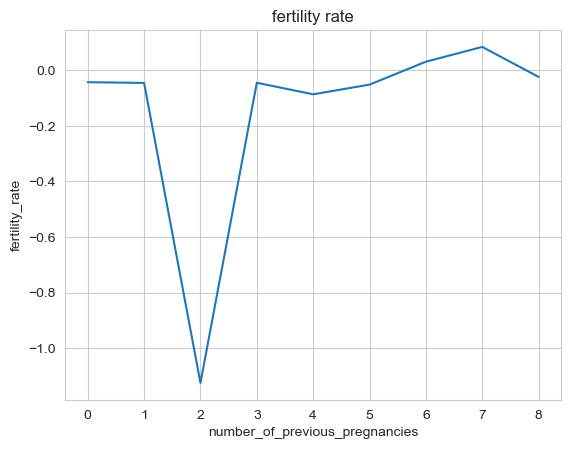

In [59]:
import numpy as np
coefficients=model.coef_
plt.plot(np.arange(len(coefficients)),coefficients)
plt.title('fertility rate')
plt.xlabel('number_of_previous_pregnancies')
plt.ylabel('fertility_rate')
plt.show()

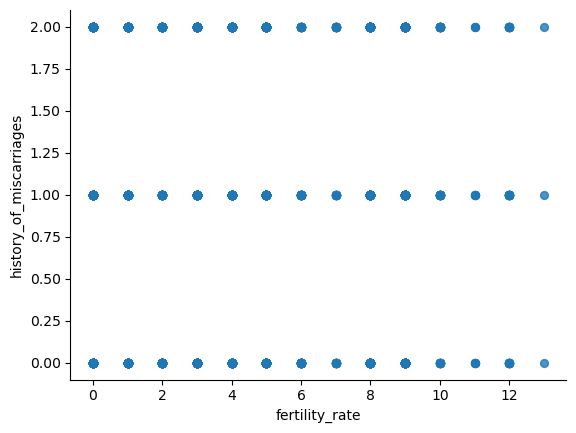

In [31]:
# Scatter plot
df_cleaned.plot(kind='scatter', x="fertility_rate", y="history_of_miscarriages", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

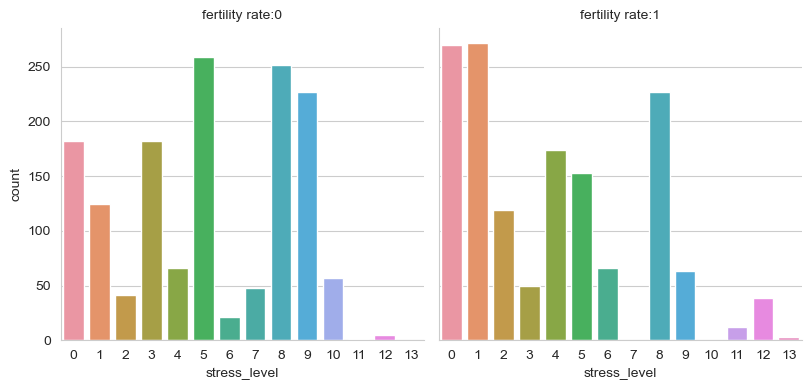

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df=pd.read_csv("female_fertility_data.csv")
df.head()
g=sns.catplot(
    data=df,
    x="fertility_rate",
    col="menstrual_cycle_irregularity",
    kind="count",
    height=4,
    aspect=1,
    col_wrap=3
)
g.set_axis_labels("stress_level","count")
g.set_titles("fertility rate:{col_name}")
g.tight_layout()
plt.show()

In [33]:
df_cleaned.shape

(2914, 10)

In [34]:
df_cleaned["previous_fertility_treatments"].unique()

array([1, 0], dtype=int64)

In [35]:
df_cleaned["history_of_miscarriages"].unique()

array([2, 1, 0], dtype=int64)

In [36]:
df_cleaned["stress_level"].unique()

array([ 3,  5,  6,  7,  2,  8, 10,  4,  1,  9], dtype=int64)

In [37]:
df_cleaned["chronic_conditions"].unique()

array([0, 1], dtype=int64)

In [38]:
df_cleaned["exercise_habits"].unique()

array([0, 1], dtype=int64)

In [39]:
df_cleaned["menstrual_cycle_irregularity"]=pd.get_dummies(new_data['menstrual_cycle_irregularity'], dtype=int,drop_first=True)

In [40]:
df_cleaned["chronic_conditions"]=pd.get_dummies(new_data["chronic_conditions"], dtype=int,drop_first=True)
df_cleaned["exercise_habits"]=pd.get_dummies(new_data["exercise_habits"], dtype=int,drop_first=True)

In [41]:
df_cleaned["chronic_conditions"]=pd.get_dummies(new_data["chronic_conditions"], dtype=int,drop_first=True)
df_cleaned["previous_fertility_treatments"]=pd.get_dummies(new_data["previous_fertility_treatments"], dtype=int,drop_first=True)

In [42]:
df_cleaned["fertility_rate"] = pd.factorize(df_cleaned["fertility_rate"])[0]

In [43]:
df_cleaned.head()

,age,BMI,menstrual_cycle_irregularity,chronic_conditions,stress_level,fertility_rate,number_of_previous_pregnancies,previous_fertility_treatments,exercise_habits,history_of_miscarriages
0,43,33.171975,1,0,3,0,3,1,0,2
1,36,19.336654,0,1,3,1,4,1,0,1
2,40,23.625551,1,1,5,2,1,0,0,1
3,28,22.220887,0,1,6,3,4,0,0,2
4,28,34.796237,1,0,6,1,3,0,1,2


In [44]:
df_cleaned.to_csv("fertility_rate", index=False)

In [45]:
x=df_cleaned.drop(columns="fertility_rate")

In [46]:
y=df_cleaned["fertility_rate"]

In [47]:
model=linear_model.LinearRegression()

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
model.fit(x_train,y_train)

LinearRegression()

In [50]:
y_predict=model.predict(x_test)

In [51]:
y_predict.shape

(583,)

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error

#Evaluating the performance of the model
print("R_squared")
r_squa=r2_score(y_test,y_predict)
adjusted_r2 = 1 - (1 - r_squa) * (402 - 1) / (402 - 5 - 1)
print("Adjusted R", adjusted_r2)
print(r2_score(y_test,y_predict))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_predict))


R_squared
Adjusted R 0.0439781480489666
0.05589862001843082
Mean absolute error
2.882911099324644


In [53]:
import joblib
joblib_file = "linear1group3_regression_model.joblib"
joblib.dump(model, joblib_file)


['linear1group3_regression_model.joblib']

In [54]:
model_lasso=linear_model.Lasso(alpha=0.1)

In [55]:
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [56]:
y_predict_lasso=model_lasso.predict(x_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error

#Evaluating the performance of the model
print("R_squared")
r_squa=r2_score(y_test,y_predict_lasso)
adjusted_r2 = 1 - (1 - r_squa) * (402 - 1) / (402 - 5 - 1)
print("Adjusted R", adjusted_r2)
print(r2_score(y_test,y_predict_lasso))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_predict_lasso))

R_squared
Adjusted R 0.031913144037034824
0.043984052465500745
Mean absolute error
2.9075619190241206


In [58]:
Model evaluation results interpretation
 Adjusted R-Squared:
Value: 0.0439
The adjusted R-squared value of history_of_miscarriage is very low, suggesting that the model explains only a small fraction of the variance in the
dependent variable. 
Specifically, only about 3.6% of the variance is explained by the model, after accounting for the number of predictors used. 
This indicates that the model may not be capturing the underlying patterns in the data effectively,
or that the predictors included in the model do not have a strong relationship with the response variable.
Mean Absolute Error (MAE):
Value: 2.907
 The MAE represents the average absolute difference between the predicted and actual values.
An MAE of 2.796 means that, on average, the fertility_rate are off by about 2.796 units.
Depending on the context and the scale of the data, this value can give you a sense of how close the model's predictions are to the actual values.
For example, if your dependent variable is on a large scale , an MAE of 2.796 might be relatively small. However, 
if your dependent variable is on a smaller scale, this MAE could be relatively high

SyntaxError: unterminated string literal (detected at line 13) (3189872431.py, line 13)